In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

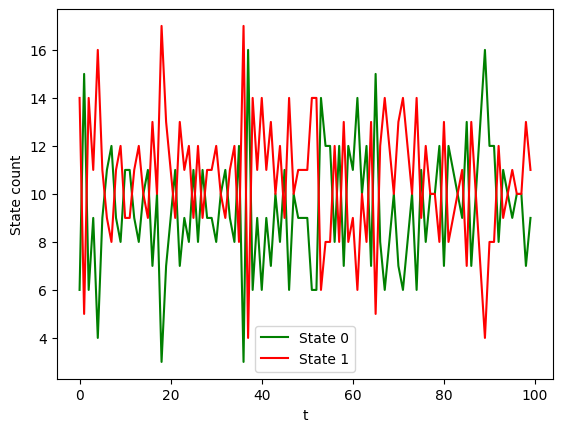

In [86]:
n = 20 #number of points created
iterations = 100
point_list = []
states = []
for i in range(n):
    x = random.uniform(-10,10)
    y = random.uniform(-10,10)
    w = random.choice([0,1]) #state
    point_list.append([x,y])
    states.append(w)

state_zero = []
state_one = []
epsilon = 0.9 #Threshold

def update(point_list, states):
    cont = [] #Contributions
    for k in range(n):
        for l in range(n): 
            if l!=k: # Want to iterate over all numbers but the one I'm considering
                d = np.sqrt(((point_list[k])[0] - (point_list[l])[0])**2 + ((point_list[k])[1] - (point_list[l])[1])**2) # Distance between the points
                delta_w = abs(states[l] - states[k]) #State difference
                val = (1/d) * delta_w
                cont.append(val)
    return cont
cont = update(point_list,states)

for t in range(iterations):
    ones = 0 #Initialize state count
    zeros = 0 
    for i in range(len(states)):       
        # Applying sigmoid
        if 1/(1 + np.e**(-sum(cont[n*(i):n*(i+1)]))) > epsilon: #Want to go within n and n contributions
            states[i] = abs(states[i] - 1) #Switch state
        else:
            states[i] = random.choice([0,1]) # If under threshold, state assignment random
        if states[i] == 1:
            ones += 1
        if states[i] == 0:
            zeros += 1
    state_zero.append(zeros) #Count states per iteration
    state_one.append(ones)
        
fig, ax = plt.subplots()
ax.plot(range(iterations),state_zero, label="State 0", color = "g")
ax.plot(range(iterations),state_one, label="State 1", color = "r")
ax.set_xlabel("t")
ax.set_ylabel("State count")
plt.legend()
plt.show()

